<a href="https://colab.research.google.com/github/Swastik200/30DaysOfDSA/blob/main/DECISION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option("display.max_rows", None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp "/content/drive/MyDrive/CMAPSS.zip" "/content"
!unzip CMAPSS.zip

Archive:  CMAPSS.zip
  inflating: CMAPSS/readme.txt       
  inflating: CMAPSS/RUL_FD001.txt    
  inflating: CMAPSS/RUL_FD002.txt    
  inflating: CMAPSS/RUL_FD003.txt    
  inflating: CMAPSS/RUL_FD004.txt    
  inflating: CMAPSS/test_FD001.txt   
  inflating: CMAPSS/test_FD002.txt   
  inflating: CMAPSS/test_FD003.txt   
  inflating: CMAPSS/test_FD004.txt   
  inflating: CMAPSS/train_FD001.txt  
  inflating: CMAPSS/train_FD002.txt  
  inflating: CMAPSS/train_FD003.txt  
  inflating: CMAPSS/train_FD004.txt  
  inflating: CMAPSS/x.txt            


In [4]:
drive_path='/content/CMAPSS/'

In [5]:
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names

In [7]:
train = pd.read_csv(drive_path+'train_FD001.txt',sep='\s+', header=None, names=col_names)
test = pd.read_csv(drive_path+'test_FD001.txt',sep='\s+', header=None, names=col_names)
y_test = pd.read_csv(drive_path+'RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])

In [8]:
train.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   392   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393   

   s_18   s_19   s_20     s_21  
0  2388  100.0  39.06  23.4190  
1  2388  100.0  39.00  23.4236  
2  2388  100.0  38.95  23.3442  
3  2388  100.0  38.88  23.3739  
4  2388  100.0  38.90  23.4044  

[5 rows x 26 columns]

In [9]:
train['unit_nr'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [10]:
train.describe()

unit_nr   time_cycles     setting_1     setting_2  setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

            s_1           s_2           s_3           s_4           s_5  ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605  1.776400e-15  ...   
min      518.67    641.210000   1571.040000   1382.250000  1.462000e+01  ...   
25%      518.67    642.325000   1586.260000   1402.360000  1.462000e+01  ...   
50%      518.67    642.640000   1590.100000   1408.040000  1.462000e+01  ...   
75%      518.67    643.000000   1594.380000   1414.555000  1.462000e+01  ...   
max      518.67    644.530000   1616.910000   1441.490000  1.462000e+01  ...   

               s_12          s_13          s_14          s_15          s_16  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean     521.413470   2388.096152   8143.752722      8.442146  3.000000e-02   
std        0.737553      0.071919     19.076176      0.037505  1.387812e-17   
min      518.690000   2387.880000   8099.940000      8.324900  3.000000e-02   
25%      520.960000   2388.040000   8133.245000      8.414900  3.000000e-02   
50%      521.480000   2388.090000   8140.540000      8.438900  3.000000e-02   
75%      521.950000   2388.140000   8148.310000      8.465600  3.000000e-02   
max      523.380000   2388.560000   8293.720000      8.584800  3.000000e-02   

               s_17     s_18     s_19          s_20          s_21  
count  20631.000000  20631.0  20631.0  20631.000000  20631.000000  
mean     393.210654   2388.0    100.0     38.816271     23.289705  
std        1.548763      0.0      0.0      0.180746      0.108251  
min      388.000000   2388.0    100.0     38.140000     22.894200  
25%      392.000000   2388.0    100.0     38.700000     23.221800  
50%      393.000000   2388.0    100.0     38.830000     23.297900  
75%      394.000000   2388.0    100.0     38.950000     23.366800  
max      400.000000   2388.0    100.0     39.430000     23.618400  

[8 rows x 26 columns]

In [11]:
train=train.drop('setting_3',axis=1)

In [12]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life

    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
train = add_remaining_useful_life(train)
train[sensor_names+['RUL']].head()

s_1     s_2      s_3      s_4    s_5    s_6     s_7      s_8      s_9  \
0  518.67  641.82  1589.70  1400.60  14.62  21.61  554.36  2388.06  9046.19   
1  518.67  642.15  1591.82  1403.14  14.62  21.61  553.75  2388.04  9044.07   
2  518.67  642.35  1587.99  1404.20  14.62  21.61  554.26  2388.08  9052.94   
3  518.67  642.35  1582.79  1401.87  14.62  21.61  554.45  2388.11  9049.48   
4  518.67  642.37  1582.85  1406.22  14.62  21.61  554.00  2388.06  9055.15   

   s_10  ...     s_13     s_14    s_15  s_16  s_17  s_18   s_19   s_20  \
0   1.3  ...  2388.02  8138.62  8.4195  0.03   392  2388  100.0  39.06   
1   1.3  ...  2388.07  8131.49  8.4318  0.03   392  2388  100.0  39.00   
2   1.3  ...  2388.03  8133.23  8.4178  0.03   390  2388  100.0  38.95   
3   1.3  ...  2388.08  8133.83  8.3682  0.03   392  2388  100.0  38.88   
4   1.3  ...  2388.04  8133.80  8.4294  0.03   393  2388  100.0  38.90   

      s_21  RUL  
0  23.4190  191  
1  23.4236  190  
2  23.3442  189  
3  23.3739  188  
4  23.4044  187  

[5 rows x 22 columns]

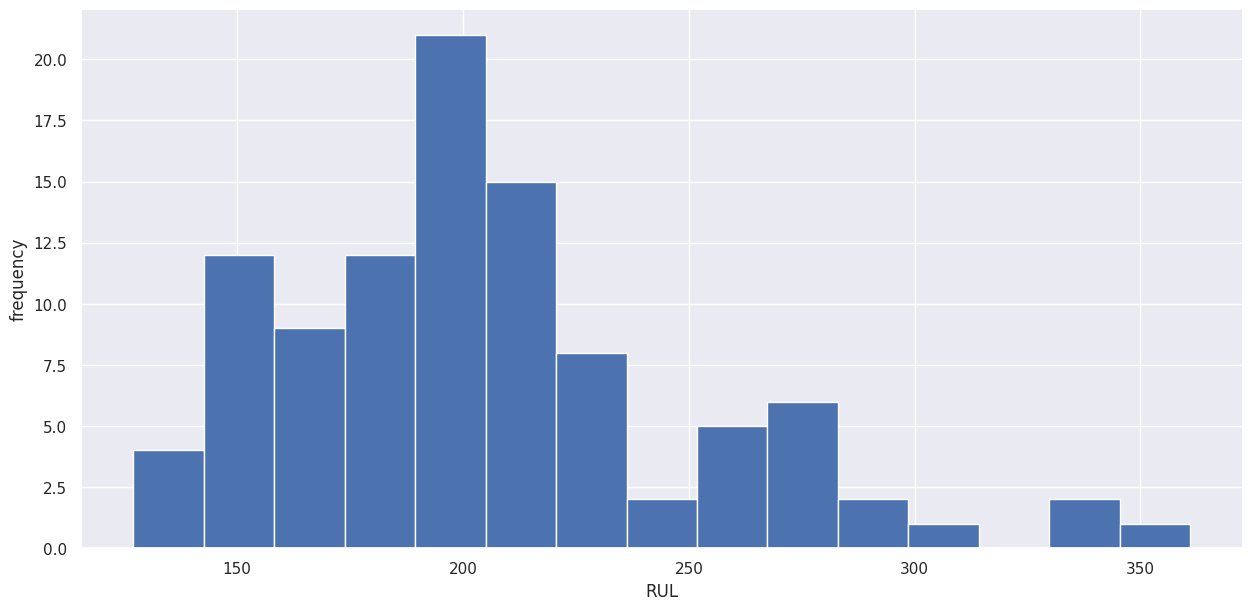

In [13]:
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

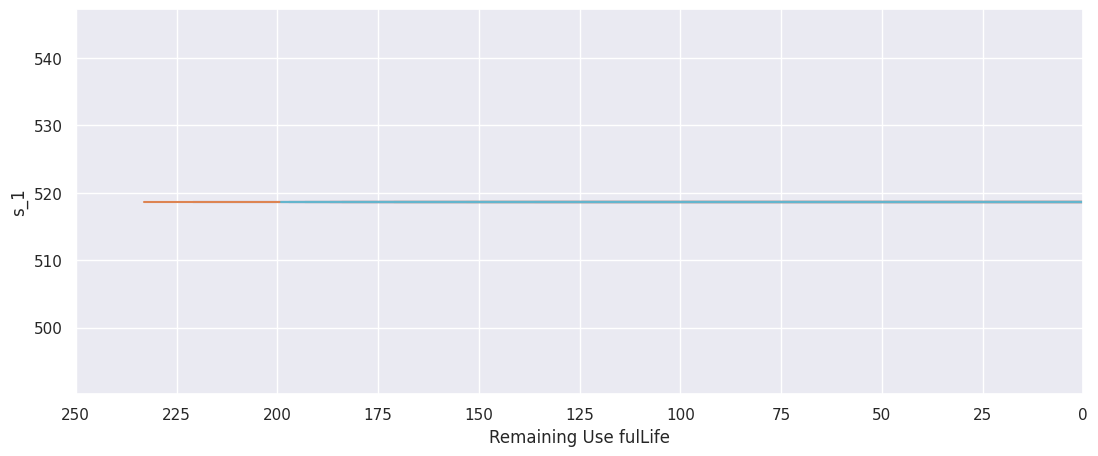

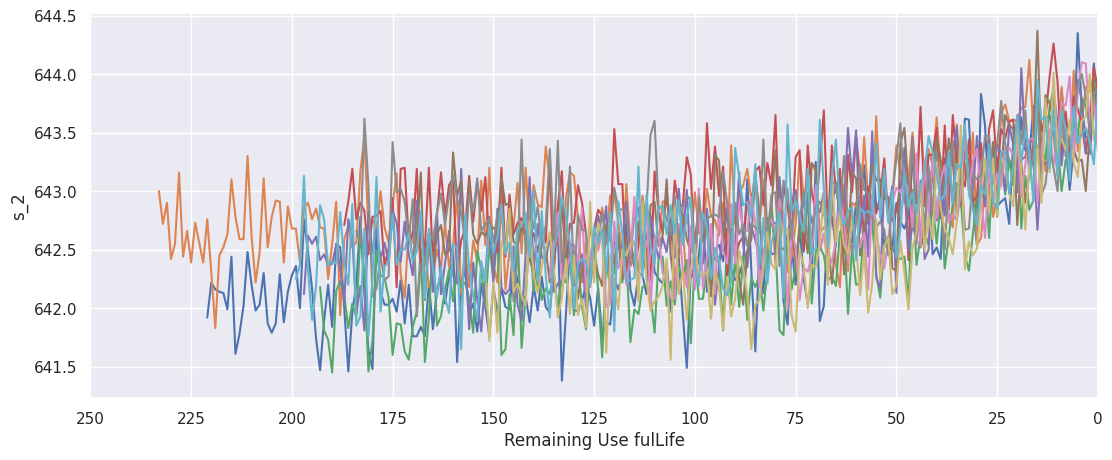

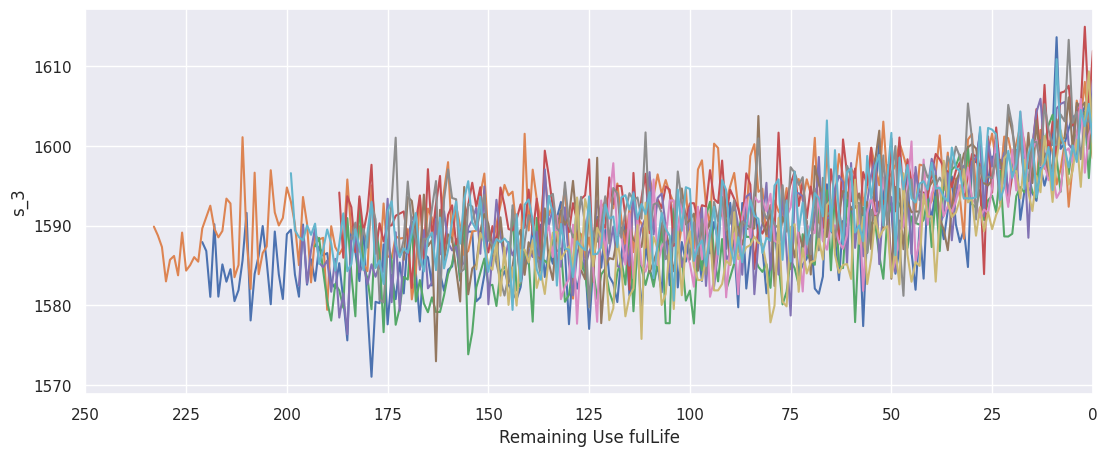

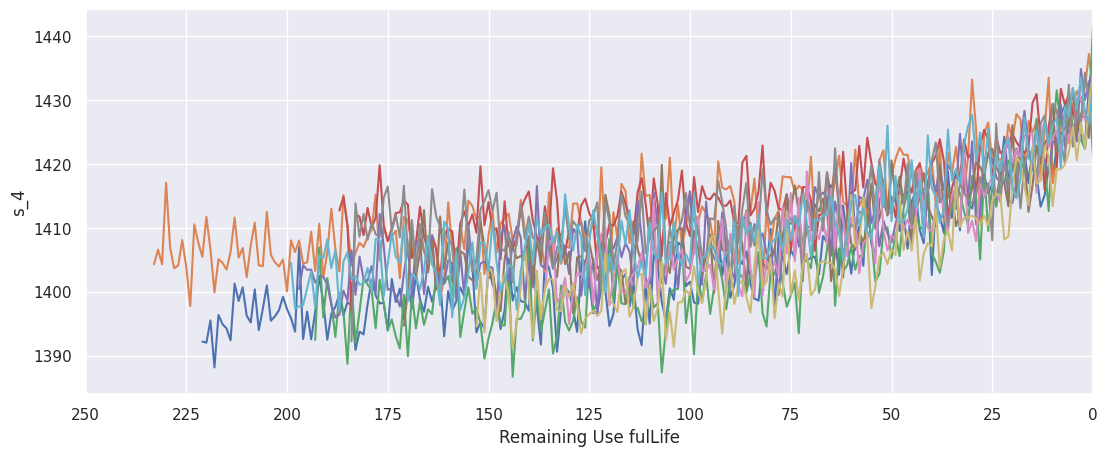

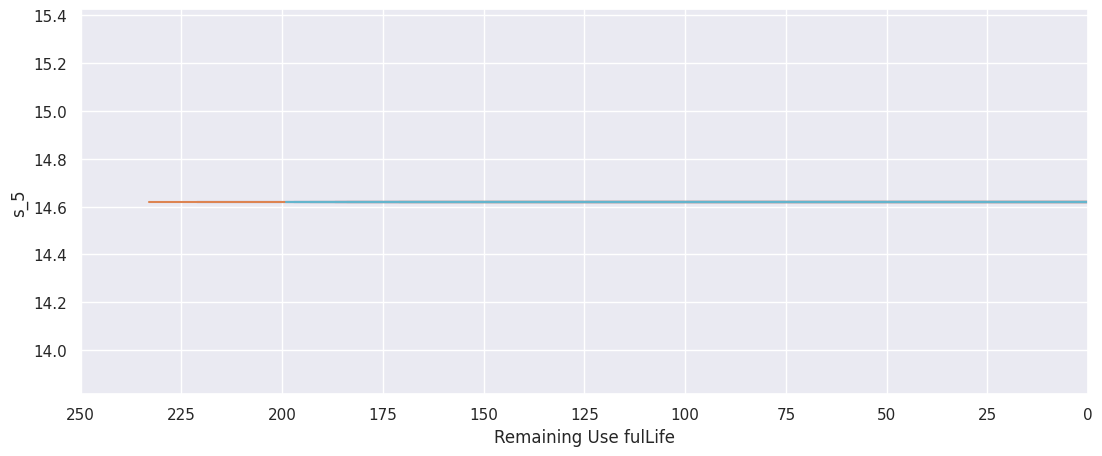

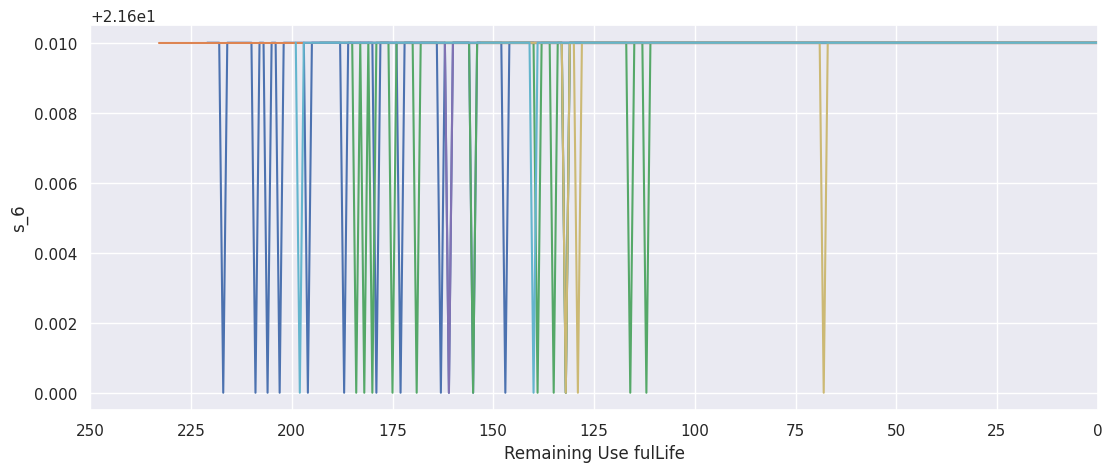

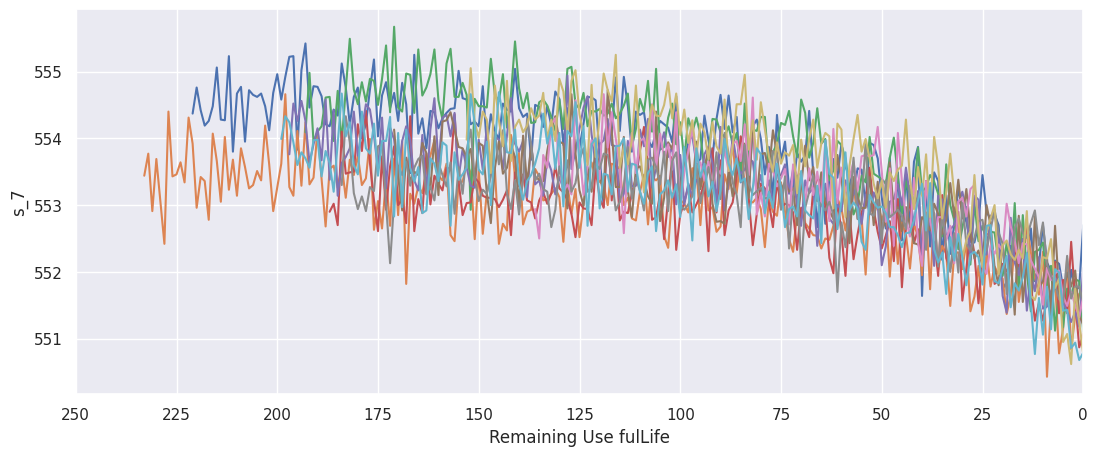

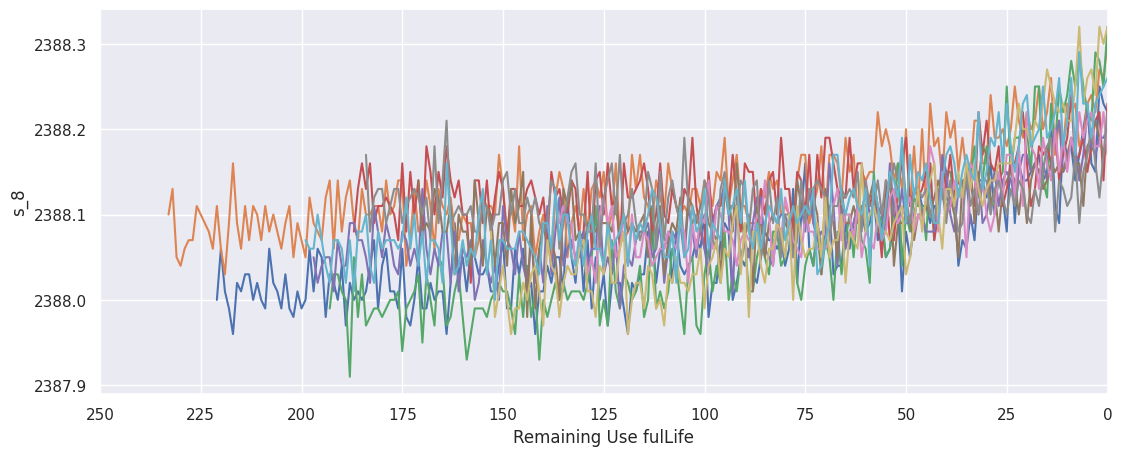

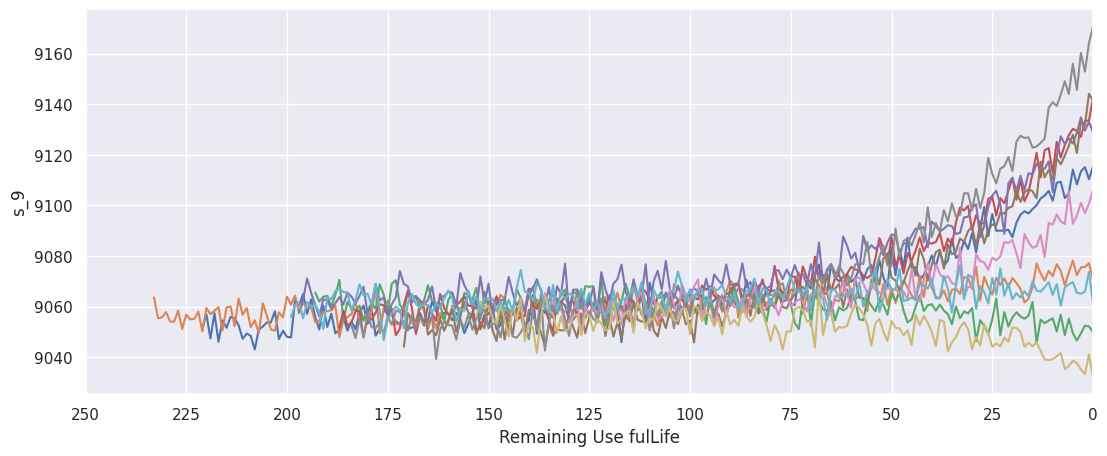

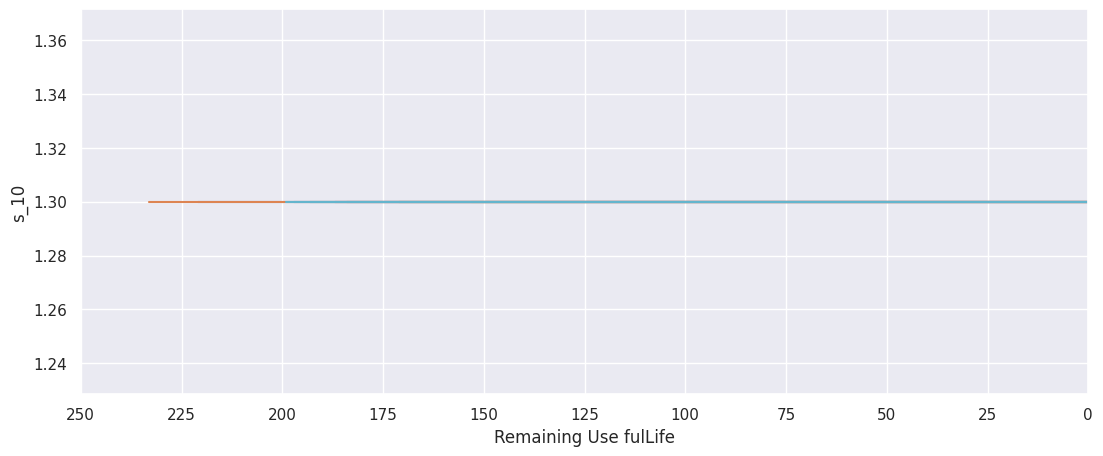

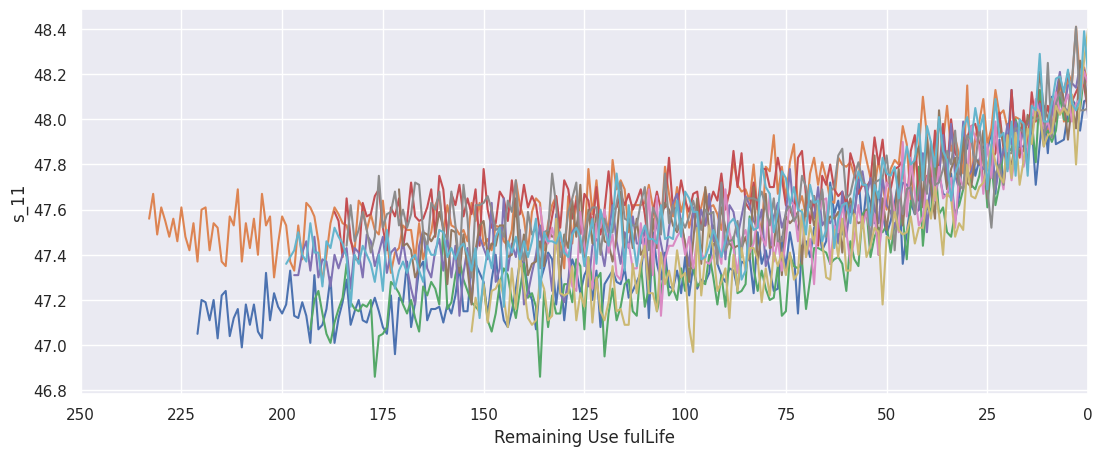

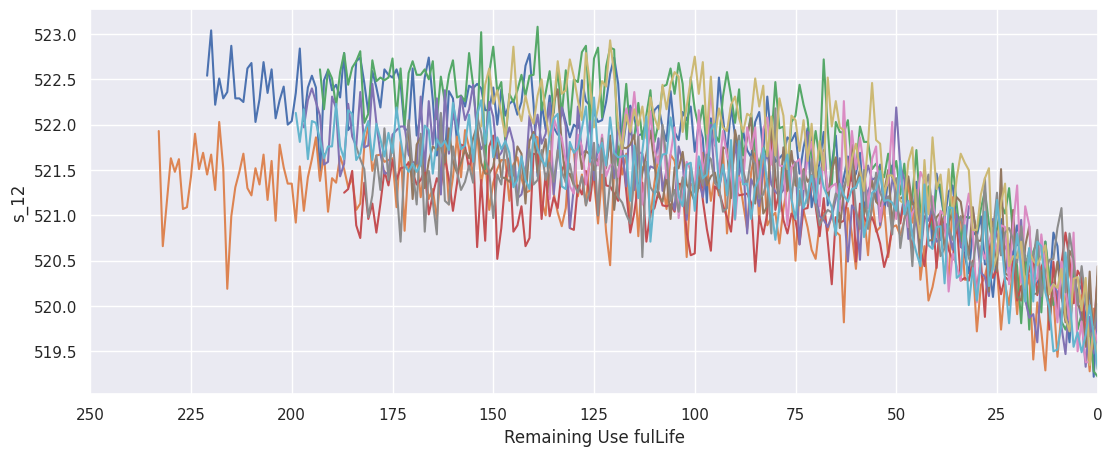

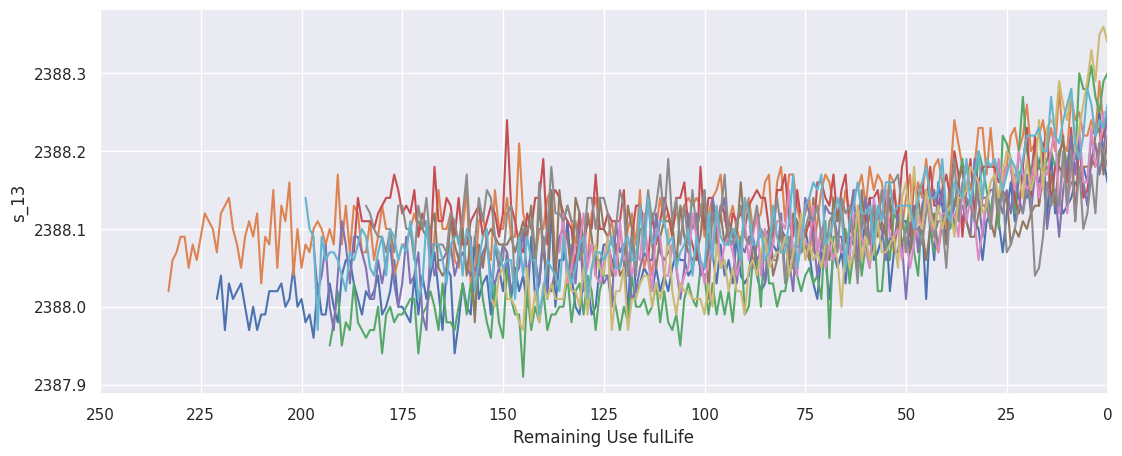

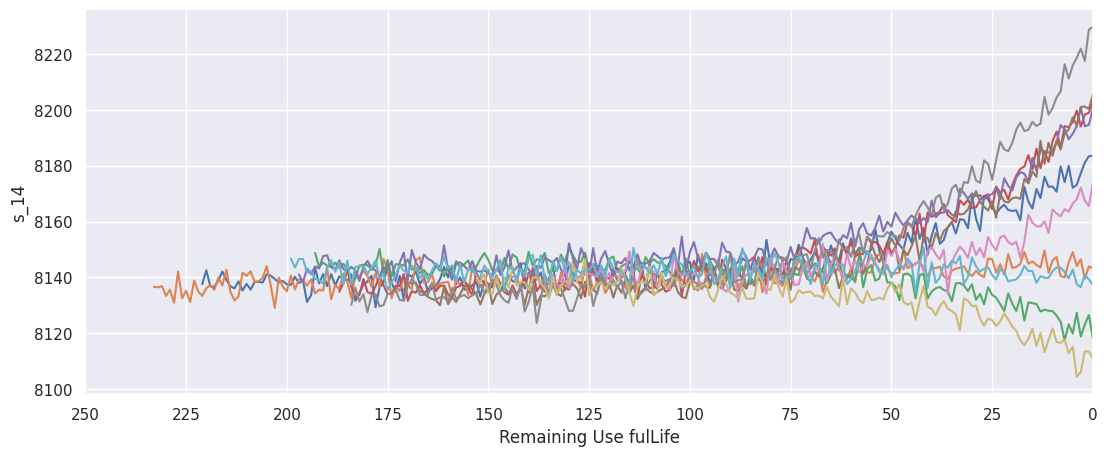

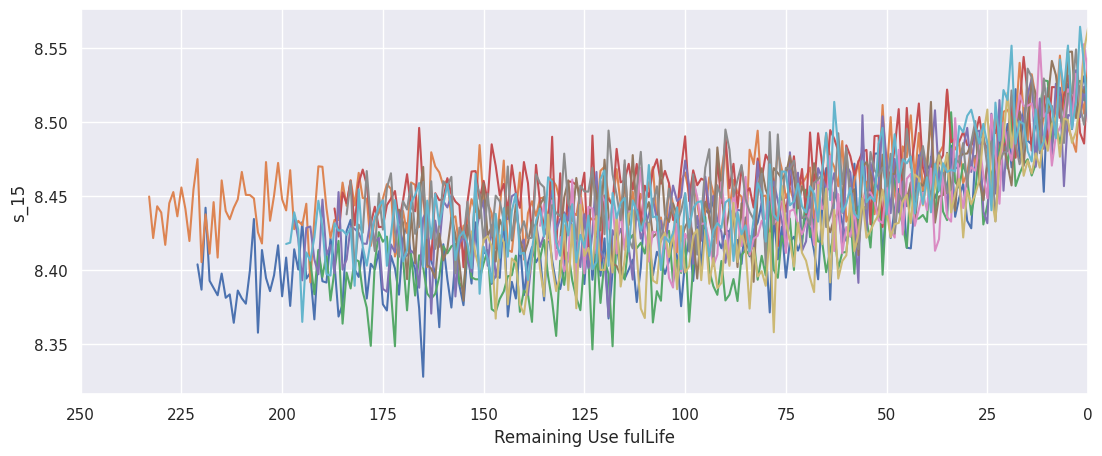

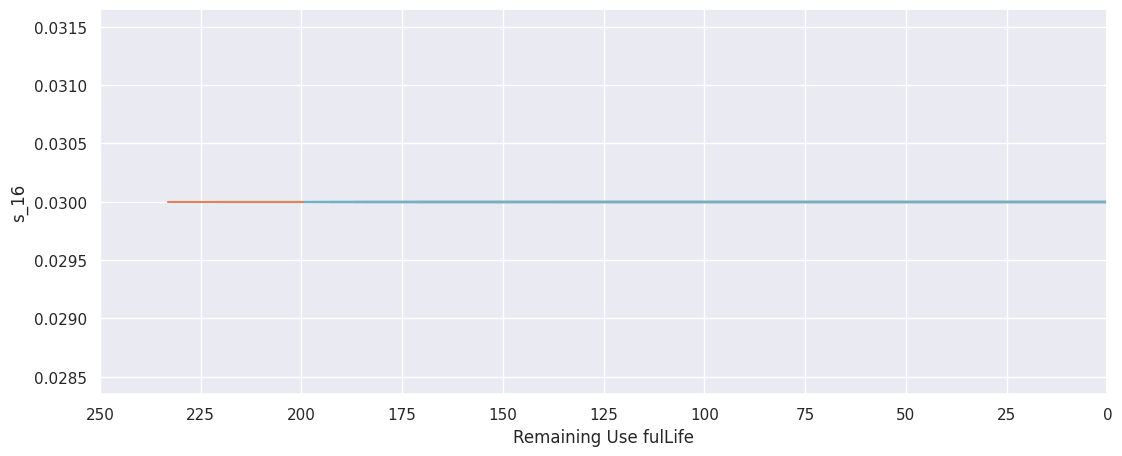

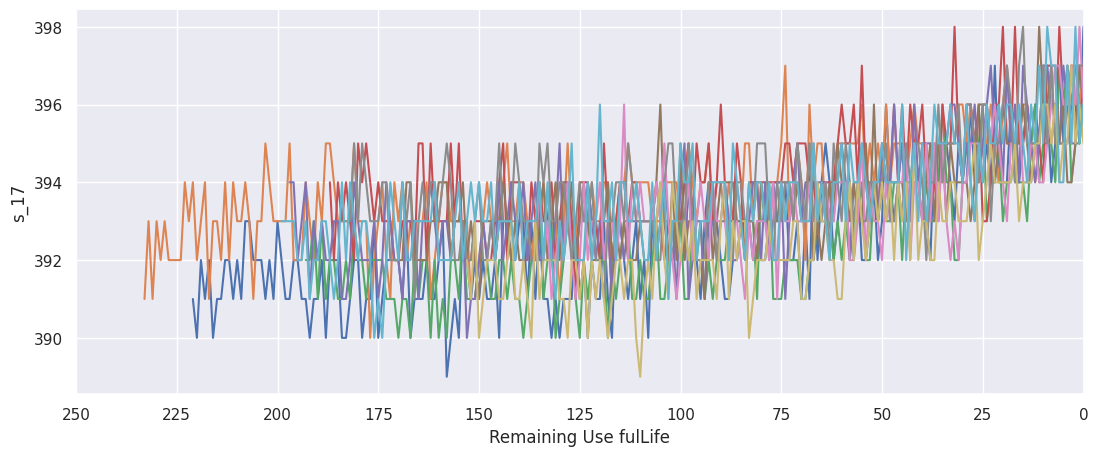

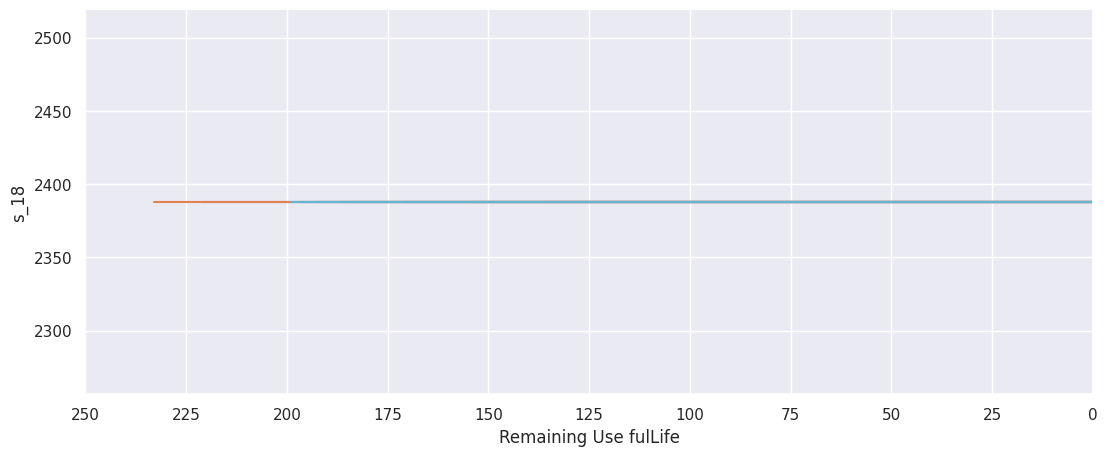

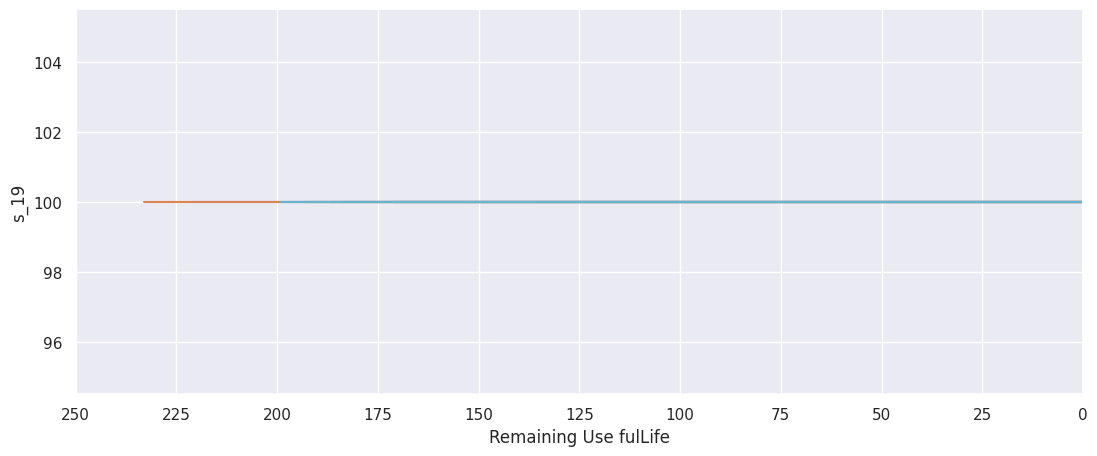

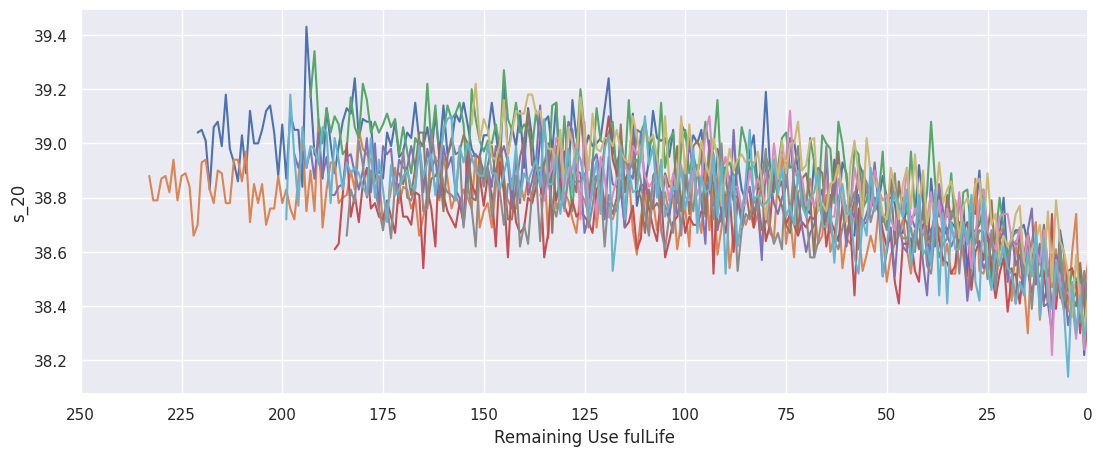

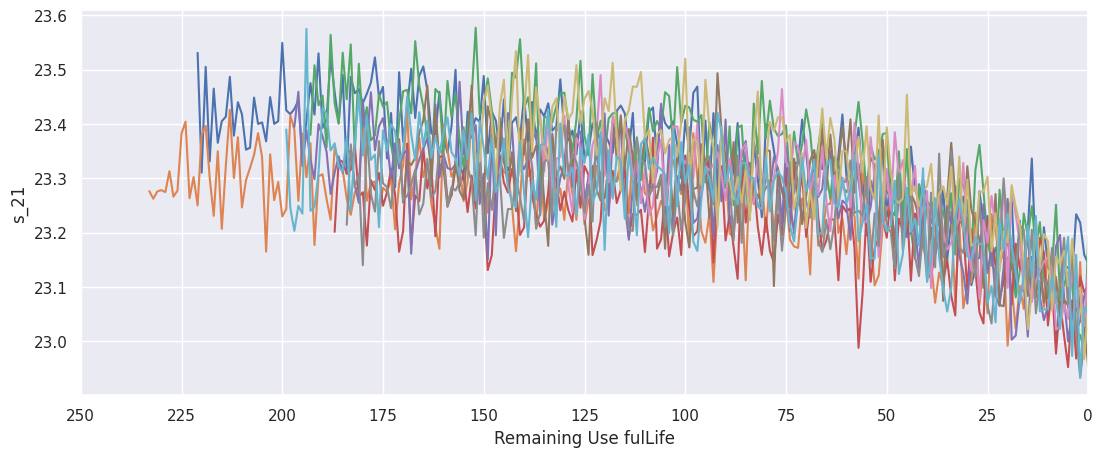

In [14]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name,
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()
for sensor_name in sensor_names:
    plot_sensor(sensor_name)

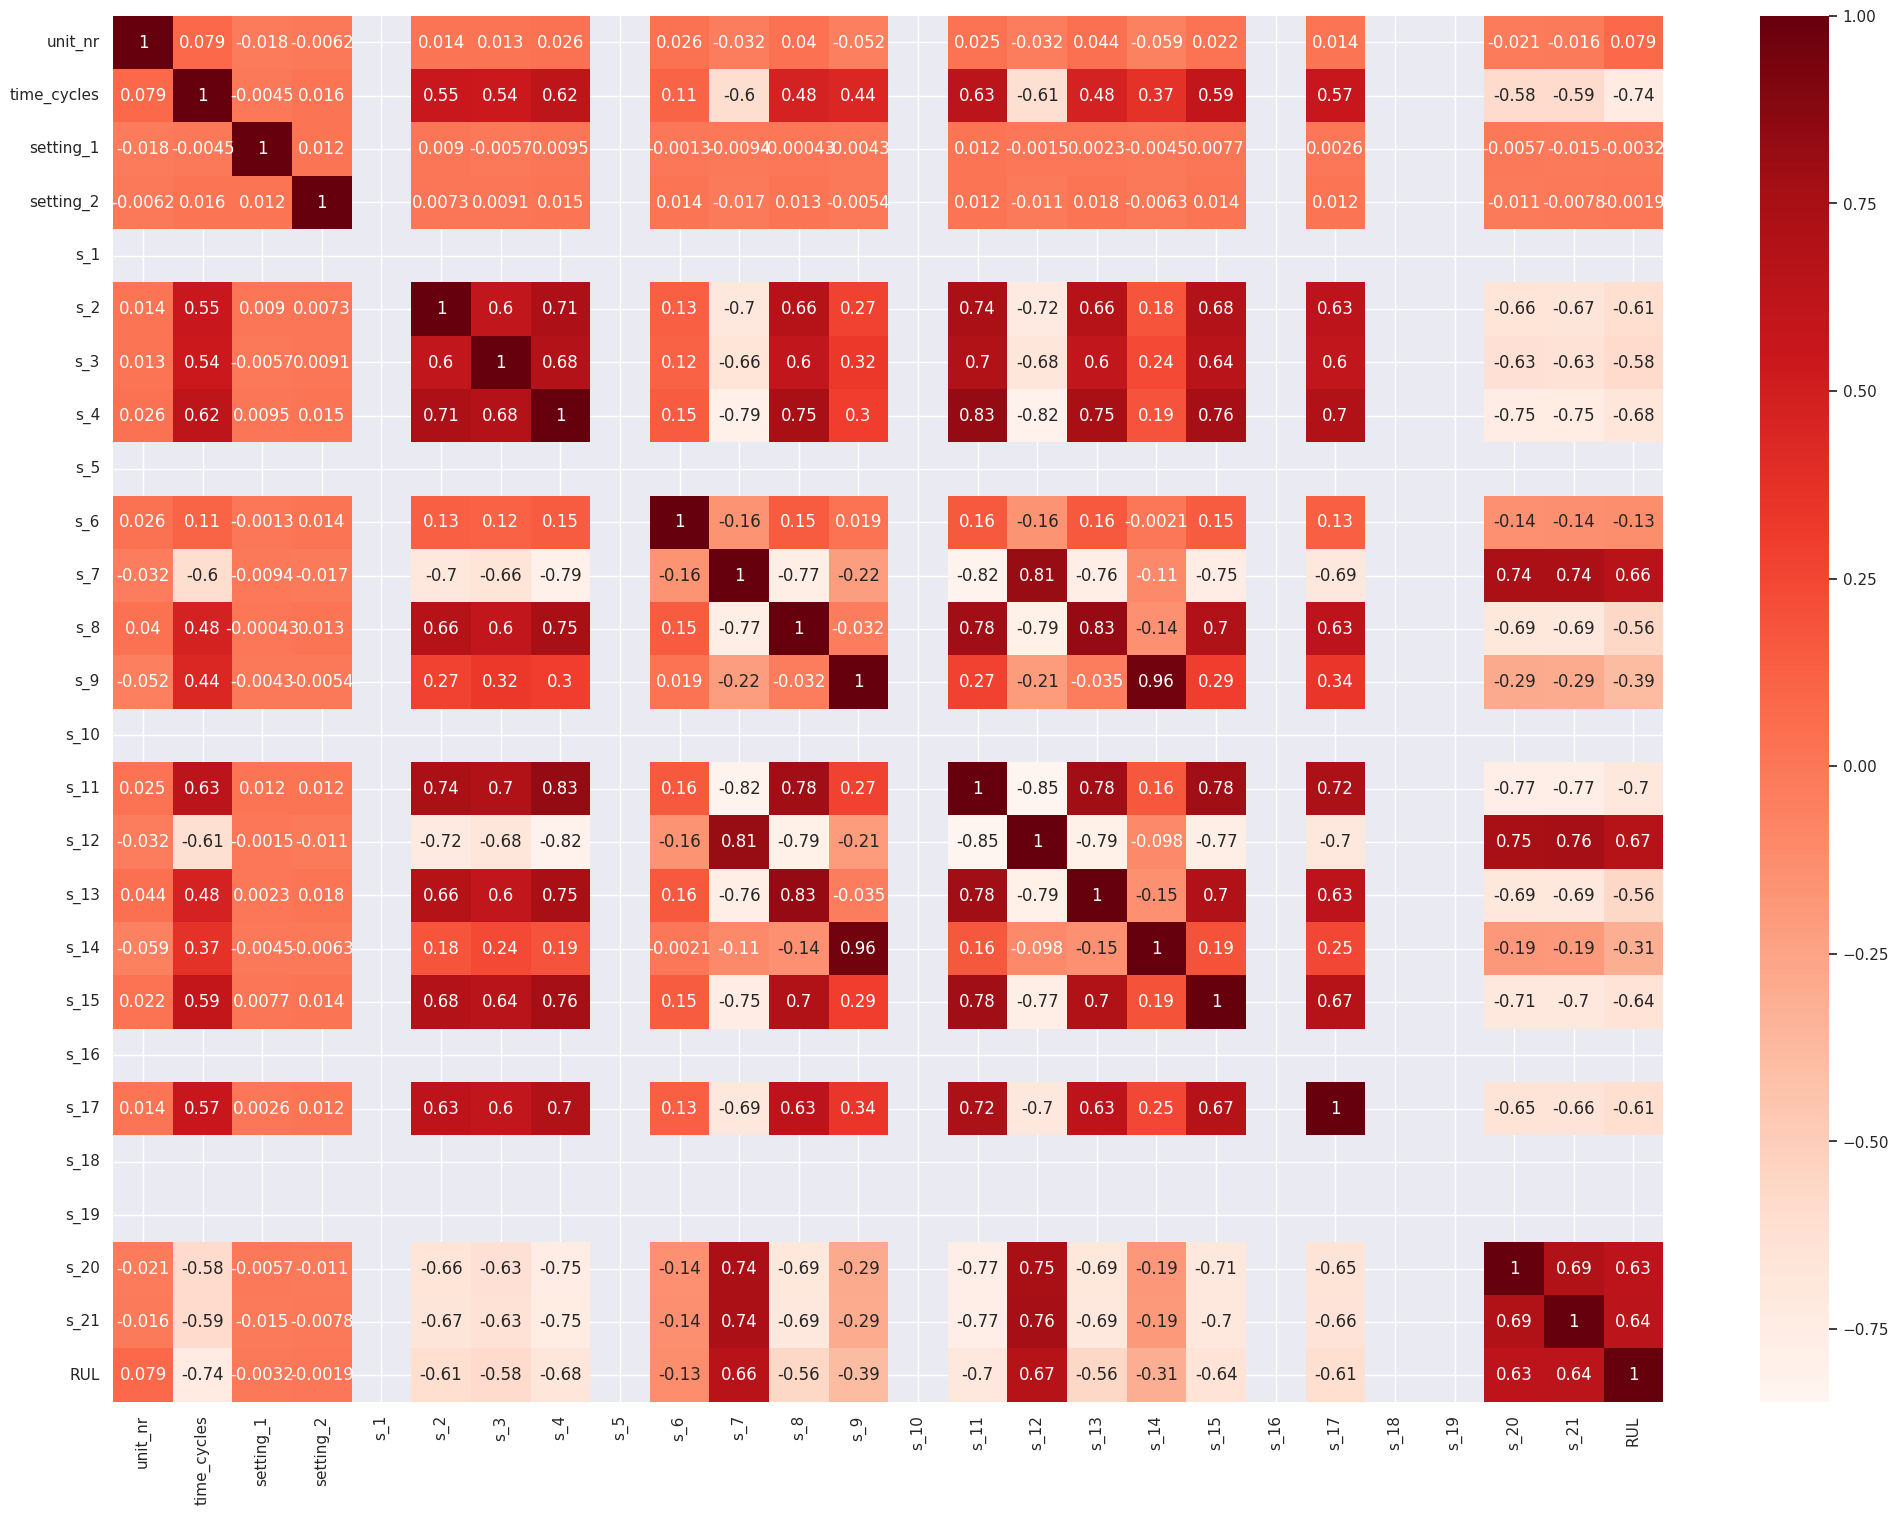

In [15]:
plt.figure(figsize=(25,18))
sns.heatmap(train.corr(),annot=True ,cmap='Reds')
plt.show()

In [16]:
cor=train.corr()

In [17]:
train_relevant_features = cor[abs(cor['RUL'])>=0.5]
train_relevant_features['RUL']


time_cycles   -0.736241
s_2           -0.606484
s_3           -0.584520
s_4           -0.678948
s_7            0.657223
s_8           -0.563968
s_11          -0.696228
s_12           0.671983
s_13          -0.562569
s_15          -0.642667
s_17          -0.606154
s_20           0.629428
s_21           0.635662
RUL            1.000000
Name: RUL, dtype: float64

In [18]:
list_relevant_features=train_relevant_features.index
list_relevant_features=list_relevant_features[1:]
list_relevant_features

Index(['s_2', 's_3', 's_4', 's_7', 's_8', 's_11', 's_12', 's_13', 's_15',
       's_17', 's_20', 's_21', 'RUL'],
      dtype='object')

In [19]:
train=train[list_relevant_features]

In [20]:
y_train=train['RUL']
X_train=train.drop(['RUL'],axis=1)
X_train.head(5)

s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0  641.82  1589.70  1400.60  554.36  2388.06  47.47  521.66  2388.02  8.4195   
1  642.15  1591.82  1403.14  553.75  2388.04  47.49  522.28  2388.07  8.4318   
2  642.35  1587.99  1404.20  554.26  2388.08  47.27  522.42  2388.03  8.4178   
3  642.35  1582.79  1401.87  554.45  2388.11  47.13  522.86  2388.08  8.3682   
4  642.37  1582.85  1406.22  554.00  2388.06  47.28  522.19  2388.04  8.4294   

   s_17   s_20     s_21  
0   392  39.06  23.4190  
1   392  39.00  23.4236  
2   390  38.95  23.3442  
3   392  38.88  23.3739  
4   393  38.90  23.4044

In [21]:
X_test=test[X_train.columns]
X_test.head(5)

s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0  643.02  1585.29  1398.21  553.90  2388.04  47.20  521.72  2388.03  8.4052   
1  641.71  1588.45  1395.42  554.85  2388.01  47.50  522.16  2388.06  8.3803   
2  642.46  1586.94  1401.34  554.11  2388.05  47.50  521.97  2388.03  8.4441   
3  642.44  1584.12  1406.42  554.07  2388.03  47.28  521.38  2388.05  8.3917   
4  642.51  1587.19  1401.92  554.16  2388.01  47.31  522.15  2388.03  8.4031   

   s_17   s_20     s_21  
0   392  38.86  23.3735  
1   393  39.02  23.3916  
2   393  39.08  23.4166  
3   391  39.00  23.3737  
4   390  38.99  23.4130

In [22]:
y_train= y_train.clip(upper=125)

In [23]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    return rmse,variance;

In [29]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Assuming X_train1, X_test1, y_train, and y_test are defined

# Define and train the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42, max_depth=15, min_samples_leaf=18)
dt.fit(X_train1, y_train)



DecisionTreeRegressor(max_depth=15, min_samples_leaf=18, random_state=42)

In [30]:
y_hat_train1=dt.predict(X_train1)


In [31]:
RMSE_Train,R2_Train=evaluate(y_train,y_hat_train1,'train')

train set RMSE:19.07349868795329, R2:0.7905127090581507


In [32]:
y_hat_test1=dt.predict(X_test1)

In [35]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd


In [36]:
dt = DecisionTreeRegressor(random_state=42, max_depth=15, min_samples_leaf=18)
dt.fit(X_train1, y_train)


DecisionTreeRegressor(max_depth=15, min_samples_leaf=18, random_state=42)

In [37]:
y_hat_train1 = dt.predict(X_train1)

In [38]:
RMSE_Train, R2_Train = evaluate(y_train, y_hat_train1, 'train')

train set RMSE:19.07349868795329, R2:0.7905127090581507


In [39]:
y_hat_test1 = dt.predict(X_test1)

In [40]:
y_test = y_test[:len(y_hat_test1)]


In [44]:
print(y_test.shape)
print(y_hat_test1.shape)

(100, 1)
(13096,)


In [45]:
!pip install pandas

In [46]:
import pandas as pd

In [47]:
if y_test.shape[0] != y_hat_test1.shape[0]:
    y_hat_test1 = y_hat_test1[:y_test.shape[0]]

In [48]:
RMSE_Test, R2_Test = evaluate(y_test, y_hat_test1, 'test')

test set RMSE:54.50639679756141, R2:-0.7204236451051158
